In [2]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import numpy as np
from pointpats import centrography
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy import stats
import shapely as shapely

In [3]:
df = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\namerica\narivs.shp")

In [7]:
df

,cat,UP_CELLS,AREA,DISCHARGE,WIDTH,WIDTH5,WIDTH95,DEPTH,DEPTH5,DEPTH95,ARCID,geometry
0,1,808,109.29,0.46,4.89,1.79,13.50,0.20,0.09,0.46,389,"LINESTRING (-106.91875 59.99792, -106.90625 59..."
1,2,151,81.59,0.35,4.23,1.56,11.62,0.18,0.08,0.41,391,"LINESTRING (-106.48333 59.99375, -106.46458 59..."
2,3,124,30.11,0.13,2.59,0.97,6.97,0.12,0.06,0.28,397,"LINESTRING (-104.06250 59.99792, -104.03958 59..."
3,4,142,42.70,0.18,3.08,1.15,8.34,0.14,0.06,0.32,406,"LINESTRING (-103.69583 59.98958, -103.71875 59..."
4,5,3185,353.49,9.35,22.01,7.60,64.58,0.65,0.28,1.54,408,"LINESTRING (-98.13125 59.98958, -98.12292 59.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
467968,467969,3648,2936.20,11.82,24.75,8.51,72.95,0.71,0.31,1.69,398133,"LINESTRING (-116.56458 36.54375, -116.56458 36..."
467969,467970,588,272.55,1.13,7.67,2.76,21.57,0.28,0.13,0.66,425122,"LINESTRING (-115.38542 34.39167, -115.38542 34..."
467970,467971,526,226.08,0.94,6.99,2.53,19.60,0.26,0.12,0.62,428020,"LINESTRING (-114.70000 34.19167, -114.68958 34..."
467971,467972,344,182.60,0.76,6.29,2.29,17.57,0.24,0.11,0.57,440701,"LINESTRING (-114.94375 33.07500, -114.94375 33..."


In [22]:
df.groupby(df['AREA']).count()

,cat,UP_CELLS,DISCHARGE,WIDTH,WIDTH5,WIDTH95,DEPTH,DEPTH5,DEPTH95,ARCID,geometry
AREA,,,,,,,,,,,
11.22,1,1,1,1,1,1,1,1,1,1,1
11.40,1,1,1,1,1,1,1,1,1,1,1
11.47,1,1,1,1,1,1,1,1,1,1,1
11.51,1,1,1,1,1,1,1,1,1,1,1
11.54,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3175157.75,2,2,2,2,2,2,2,2,2,2,2
3175338.75,2,2,2,2,2,2,2,2,2,2,2
3175444.00,2,2,2,2,2,2,2,2,2,2,2


In [5]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

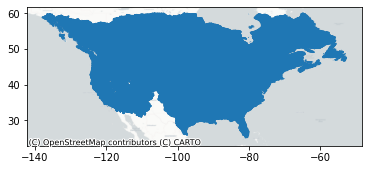

In [6]:
ax = df.plot(markersize=5)
cx.add_basemap(ax, crs=df.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [9]:
ca = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\ca-state-boundary\CA_State_TIGER2016.shp")

In [10]:
ca = ca.to_crs("EPSG:4326")

In [16]:
ny = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\Intro to GIS\NY shapefile data\State.shp")
ny = ny.to_crs("EPSG:4326")

In [11]:
gdfca_river = df.sjoin(ca)

In [17]:
gdfny_river = df.sjoin(ny)

In [14]:
list1 = list(gdfca_river)

In [15]:
print(list1)

['cat', 'UP_CELLS', 'AREA', 'DISCHARGE', 'WIDTH', 'WIDTH5', 'WIDTH95', 'DEPTH', 'DEPTH5', 'DEPTH95', 'ARCID', 'geometry', 'index_right', 'REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON']


In [20]:
gdfca_river.groupby(gdfca_river['AREA']).count()

,cat,UP_CELLS,DISCHARGE,WIDTH,WIDTH5,WIDTH95,DEPTH,DEPTH5,DEPTH95,ARCID,...,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
AREA,,,,,,,,,,,,,,,,,,,,,
16.86,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.15,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.87,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
18.02,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
18.44,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614983.44,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
615038.06,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
615081.69,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [13]:
gdfca_river

,cat,UP_CELLS,AREA,DISCHARGE,WIDTH,WIDTH5,WIDTH95,DEPTH,DEPTH5,DEPTH95,...,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
313344,313345,172,545.90,2.25,10.80,3.84,30.79,0.37,0.16,0.87,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
313345,313346,3257,545.90,2.25,10.80,3.84,30.79,0.37,0.16,0.87,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
313489,313490,903,169.74,0.71,6.07,2.21,16.92,0.24,0.11,0.55,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
313490,313491,918,276.54,1.15,7.72,2.78,21.73,0.29,0.13,0.67,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
313576,313577,334,82.81,0.35,4.26,1.57,11.71,0.18,0.08,0.41,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467948,467949,546,124.46,0.52,5.21,1.91,14.43,0.21,0.09,0.49,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
467966,467967,203,742.30,3.05,12.57,4.44,36.05,0.42,0.18,0.98,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
467969,467970,588,272.55,1.13,7.67,2.76,21.57,0.28,0.13,0.66,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
467970,467971,526,226.08,0.94,6.99,2.53,19.60,0.26,0.12,0.62,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183


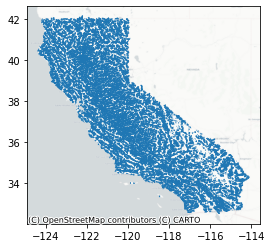

In [31]:
ax = gdfca_river.plot(markersize=5)
cx.add_basemap(ax, crs=gdfca_river.crs, 
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

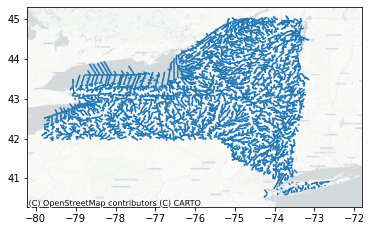

In [21]:
ax = gdfny_river.plot(markersize=5)
cx.add_basemap(ax, crs=gdfny_river.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [25]:
bdf = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\wbdline_l_us_september2021\wbdline_l_us_september2021.gdb")

In [26]:
bdf #usgs rivershed map

,tnmid,hudigit,humod,linesource,metasourceid,loaddate,globalid,Shape_Length,geometry
0,{D97B6ED3-AC9F-4CC5-B388-FF060EDB5594},2,None,NOAA3NM,None,2012-10-15T12:57:06+00:00,{FF4267FB-3B63-42C2-AA4F-0611817C4182},0.556776,"MULTILINESTRING ((-118.65348 33.51078, -118.65..."
1,{0F6B50CB-529F-4AF9-9BA3-2EC3900C5C83},2,None,NOAA3NM,None,2012-10-15T12:57:06+00:00,{38F43257-0D9F-46BC-8476-B28230EB5C3F},0.574227,"MULTILINESTRING ((-118.25945 33.27548, -118.25..."
2,{1F6E1B85-8458-4CB1-8E83-0BF168794ADF},2,NM,NOAA3NM,None,2012-10-15T12:57:06+00:00,{C398E0AB-42AA-4D72-8141-6D08AB8997AE},0.429342,"MULTILINESTRING ((-119.04849 33.41299, -119.04..."
3,{4B209E01-6BF7-44EB-8BE9-8374D6662E6A},2,None,NOAA3NM,None,2012-10-15T12:57:06+00:00,{ABF8C148-F9BB-42EE-91A1-AC025E84C544},0.154397,"MULTILINESTRING ((-117.99225 33.58590, -117.99..."
4,{8E6D38FB-23CD-46BD-8ACD-76596856C993},2,None,NOAA3NM,None,2012-10-15T12:57:06+00:00,{B7C3E404-1976-4638-B458-534015135937},0.190898,"MULTILINESTRING ((-118.11488 33.67482, -118.11..."
...,...,...,...,...,...,...,...,...,...
394362,{059B7F0C-0984-4CA9-9935-F4FBA045D629},4,None,"DRG24,NHD24,3DEP10M2019",{FED24CF8-D079-4A9E-A770-AB364E2F1DAF},2021-06-15T12:56:59+00:00,{D3C4E3CA-3D50-4D4E-A532-BB19477B1D0B},0.052041,"MULTILINESTRING ((-97.36086 27.93834, -97.3605..."
394363,{5C0BF693-0016-41A3-B274-0F022C51F8A3},4,NM,"MEX50,MEXTOPO,OTH",{0798C084-7771-47E5-BD5C-F5CAF80EBC7A},2021-06-16T09:16:20+00:00,{70F8EEAF-2FAC-4D82-8223-3FA33A732B26},0.021833,"MULTILINESTRING ((-114.02440 32.16813, -114.02..."
394364,{C2B25D79-48AE-47D2-AF0E-811523F6EB80},4,None,"DRG24,NHD24,3DEP10M2019",{04149610-944D-440F-A375-DB36668282EC},2021-06-23T07:14:30+00:00,{A1E52096-16C0-4AE6-9995-3701C3735B25},0.043568,"MULTILINESTRING ((-96.18119 31.37517, -96.1809..."
394365,{C2BC29D9-60C6-4F12-8FBB-486C4CE28EC4},4,None,"DRG24,NHD24,3DEP10M2020",{2F1CDB20-BED6-4C6A-ADD2-003F5EAF126C},2021-06-23T07:36:52+00:00,{91DB2438-84CF-4657-B297-C21EB52DB628},0.087446,"MULTILINESTRING ((-95.49101 29.02683, -95.4911..."


In [27]:
bdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

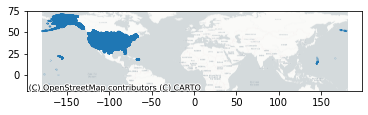

In [28]:
ax = bdf.plot(markersize=5)
cx.add_basemap(ax, crs=bdf.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [29]:
#gdffl = gpd.sjoin(gdf1, fl, how='left', predicate='within')
gdfca_rivershed = bdf.sjoin(ca)

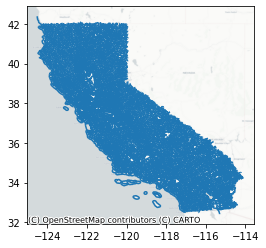

In [30]:
ax = gdfca_rivershed.plot(markersize=5)
cx.add_basemap(ax, crs=gdfca_rivershed.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [32]:
ca_rivershed = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\hybas_na_lev01-12_v1c\hybas_na_lev05_v1c.shp")

In [56]:
ca_rivershed2 = rivershed.sjoin(ca) #joined at level 4

In [71]:
rivershed4 = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\hybas_na_lev01-12_v1c\hybas_na_lev03_v1c.shp")
rivershed3 = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\hybas_na_lev01-12_v1c\hybas_na_lev04_v1c.shp")
rivershed5 = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\hybas_na_lev01-12_v1c\hybas_na_lev05_v1c.shp")

In [87]:
ca_rivershed1.to_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\basin shapefiles\ca riverbasins.shp")
fl_rivershed5.to_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\basin shapefiles\fl riverbasins.shp")
ny_rivershed5.to_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\basin shapefiles\ny riverbasins.shp")
tx_rivershed1.to_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\basin shapefiles\tx riverbasins.shp")

C:\Users\p7j5p\miniconda3\envs\info615\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\p7j5p\AppData\Local\Temp\ipykernel_26636\4005621215.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  ca_rivershed1.to_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\basin shapefiles\ca riverbasins.shp")
C:\Users\p7j5p\miniconda3\envs\info615\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\p7j5p\AppData\Local\Temp\ipykernel_26636\4005621215.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  fl_rivershed5.to_file(r"C:\Users\p7j5p\Documents\P

In [ ]:
tx4 good
fl5 good
ny5 good

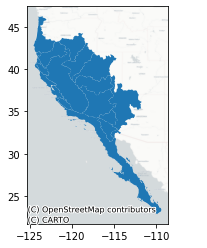

In [58]:
ax = ca_rivershed2.plot(markersize=5)
cx.add_basemap(ax, crs=ca_rivershed2.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [57]:
ca_rivershed2

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,...,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
9,7040008710,0,7040008710,7040008710,0.0,0.0,5056.9,620437.5,7721,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
11,7040707710,7040008710,7040008710,7040008710,184.2,184.2,117076.9,466505.3,7723,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
18,7040008720,0,7040008720,7040008720,0.0,0.0,177193.6,177193.6,7741,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
19,7040013170,0,7040013170,7040013170,0.0,0.0,11094.9,11095.2,7742,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
20,7040013180,0,7040013180,7040013180,0.0,0.0,11373.5,11373.5,7743,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
21,7040013550,0,7040013550,7040013550,0.0,0.0,156294.6,156294.6,7744,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
22,7040013560,0,7040013560,7040013560,0.0,0.0,13957.8,13957.8,7745,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
23,7040014040,0,7040014040,7040014040,0.0,0.0,9366.0,9366.1,7746,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
24,7040014050,0,7040014050,7040014050,0.0,0.0,3013.8,3013.8,7747,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183
25,7040014200,0,7040014200,7040014200,0.0,0.0,40894.6,40894.6,7748,0,...,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183


In [40]:
#ca = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696\ca-state-boundary\CA_State_TIGER2016.shp") #Need to reproject to 4326
fl = gpd.read_file("https://gis.fdot.gov/arcgis/rest/services/Admin_Boundaries/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")
#ny = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\Intro to GIS\NY shapefile data\State.shp") #Need to reproject to 4326
tx = gpd.read_file('https://services.arcgis.com/KTcxiTD9dsQw4r7Z/arcgis/rest/services/Texas_State_Boundary/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson')

In [59]:
fl_rivershed1 = rivershed.sjoin(fl)
ny_rivershed1 = rivershed.sjoin(ny)
tx_rivershed1 = rivershed.sjoin(tx)

In [72]:
fl_rivershed3 = rivershed3.sjoin(fl)
fl_rivershed4 = rivershed4.sjoin(fl)
fl_rivershed5 = rivershed5.sjoin(fl)

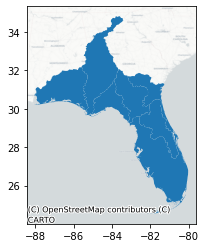

In [78]:
ax = fl_rivershed5.plot(markersize=5)
cx.add_basemap(ax, crs=fl_rivershed5.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [77]:
fl_rivershed5

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,index_right,OBJECTID,ID,Shape_STAr,Shape_STLe
400,7050043650,0,7050043650,7050043650,0.0,0.0,15018.9,15018.9,73255,0,1,0,401,"MULTIPOLYGON (((-81.26806 31.30417, -81.27837 ...",0,1,1,145697142592,7.614166e+06
401,7050043860,0,7050043860,7050043860,0.0,0.0,24673.4,24673.8,73256,0,0,1,402,"MULTIPOLYGON (((-80.55000 27.75417, -80.54879 ...",0,1,1,145697142592,7.614166e+06
402,7050043870,0,7050043870,7050043870,0.0,0.0,74206.5,74206.5,73257,0,1,0,403,"MULTIPOLYGON (((-82.79722 29.02917, -82.80047 ...",0,1,1,145697142592,7.614166e+06
403,7050045480,0,7050045480,7050045480,0.0,0.0,26559.4,26559.4,73258,0,0,1,404,"POLYGON ((-83.78333 31.03750, -83.78390 31.039...",0,1,1,145697142592,7.614166e+06
404,7050045490,0,7050045490,7050045490,0.0,0.0,18050.6,18050.6,73259,0,1,0,405,"MULTIPOLYGON (((-84.56806 29.87500, -84.57562 ...",0,1,1,145697142592,7.614166e+06
405,7050045890,0,7050045890,7050045890,0.0,0.0,50745.6,50745.6,73260,0,0,1,406,"POLYGON ((-83.51667 34.51250, -83.51740 34.504...",0,1,1,145697142592,7.614166e+06
406,7050045900,0,7050045900,7050045900,0.0,0.0,39528.2,39528.2,73270,0,1,0,407,"MULTIPOLYGON (((-85.33472 29.71667, -85.34232 ...",0,1,1,145697142592,7.614166e+06


In [65]:
ny_rivershed1

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,...,GNIS_ID,FIPS_CODE,POP1990,POP2000,POP2010,POP2020,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area
103,7040374950,7040034520,7040034520,7040034520,133.6,133.6,56632.1,986574.3,7253,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
105,7040402430,7040374950,7040034520,7040034520,301.9,301.9,263811.2,782539.6,7255,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
111,7040038340,0,7040038340,7040038340,0.0,0.0,107440.2,107440.2,7311,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
113,7040039630,0,7040039630,7040039630,0.0,0.0,8013.7,8013.7,7313,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
114,7040039870,0,7040039870,7040039870,0.0,0.0,34790.3,34791.5,7314,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
115,7040039880,0,7040039880,7040039880,0.0,0.0,59618.1,59618.1,7315,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
116,7040041050,0,7040041050,7040041050,0.0,0.0,70979.5,70980.3,7316,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
136,7040612640,7040686540,7040047060,7040047060,1586.0,1586.0,528052.3,528052.3,7426,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
166,7040064730,0,7040064730,7040064730,0.0,0.0,4014.7,4014.7,7310,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11


In [66]:
tx_rivershed1

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,index_right,OBJECTID,FIPS,CREATE_USE,CMNT
132,7040741760,7040047060,7040047060,7040047060,510.0,510.0,239521.6,239521.6,7422,0,0,2,133,"POLYGON ((-92.17083 34.28750, -92.16029 34.286...",0,1,48,TPP,None
134,7040686450,7040741770,7040047060,7040047060,967.6,967.6,414787.8,414787.8,7424,0,0,2,135,"POLYGON ((-94.22083 35.90417, -94.21867 35.903...",0,1,48,TPP,None
141,7040047850,0,7040047850,7040047850,0.0,0.0,54155.9,54155.9,7512,0,0,1,142,"POLYGON ((-95.90833 32.36250, -95.91179 32.363...",0,1,48,TPP,None
142,7040047860,0,7040047860,7040047860,0.0,0.0,1815.0,1815.0,7513,0,1,0,143,"MULTIPOLYGON (((-94.80139 29.53333, -94.81316 ...",0,1,48,TPP,None
143,7040047970,0,7040047970,7040047970,0.0,0.0,46106.8,46108.1,7514,0,0,1,144,"POLYGON ((-96.31667 33.41667, -96.31008 33.417...",0,1,48,TPP,None
144,7040047980,0,7040047980,7040047980,0.0,0.0,14703.7,14703.7,7515,0,1,0,145,"MULTIPOLYGON (((-95.45833 29.17083, -95.44784 ...",0,1,48,TPP,None
145,7040048300,0,7040048300,7040048300,0.0,0.0,118642.3,118642.3,7516,0,0,1,146,"MULTIPOLYGON (((-97.91667 30.57083, -97.91667 ...",0,1,48,TPP,None
146,7040048310,0,7040048310,7040048310,0.0,0.0,4302.4,4302.4,7517,0,1,0,147,"MULTIPOLYGON (((-95.75972 28.72917, -95.76728 ...",0,1,48,TPP,None
147,7040048410,0,7040048410,7040048410,0.0,0.0,110769.2,110769.2,7518,0,0,1,148,"POLYGON ((-102.80417 32.14583, -102.80833 32.1...",0,1,48,TPP,None
148,7040048420,0,7040048420,7040048420,0.0,0.0,115495.7,115495.7,7519,0,1,0,149,"MULTIPOLYGON (((-96.34306 28.44583, -96.35333 ...",0,1,48,TPP,None


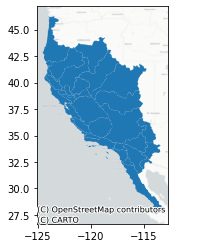

In [60]:
ax = ca_rivershed1.plot(markersize=5)
cx.add_basemap(ax, crs=ca_rivershed1.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

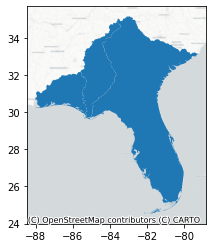

In [61]:
ax = fl_rivershed1.plot(markersize=5)
cx.add_basemap(ax, crs=fl_rivershed1.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [79]:
ny_rivershed3 = rivershed3.sjoin(ny)
ny_rivershed4 = rivershed4.sjoin(ny)
ny_rivershed5 = rivershed5.sjoin(ny)

In [83]:
ny_rivershed4

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,...,GNIS_ID,FIPS_CODE,POP1990,POP2000,POP2010,POP2020,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area
13,7030034520,0,7030034520,7030034520,0.0,0.0,1053295.9,1053295.9,725,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
15,7030038340,0,7030038340,7030038340,0.0,0.0,399621.4,399621.4,731,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11
18,7030047060,0,7030047060,7030047060,0.0,0.0,3240616.8,3240616.8,742,0,...,1779796,36,17990455,18976457,19378102,0,54561.37531,2019-10-04,2.377648e+06,1.413133e+11


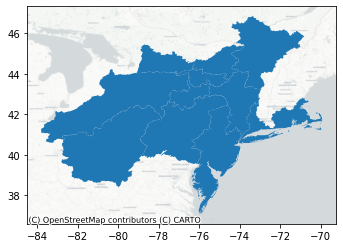

In [85]:
ax = ny_rivershed5.plot(markersize=5)
cx.add_basemap(ax, crs=ny_rivershed5
               .crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

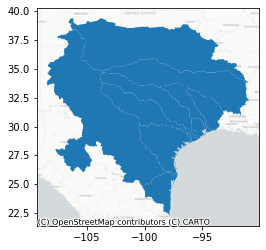

In [63]:
ax = tx_rivershed1.plot(markersize=5)
cx.add_basemap(ax, crs=tx_rivershed1.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');